In [296]:
##################################################
##### Intrusion Detection using K Means (k=59)
##################################################

import pandas
from time import time

##################################################
##### Loading the data
##################################################

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kdd_data_10percent = pandas.read_csv("kddcup.data_10_percent_corrected", header=None, names = col_names)

#kdd_data_10percent.describe()
#kdd_data_10percent['label'].value_counts()


In [266]:
#print('Label distribution Training set:')
#print(kdd_data_10percent["label"].value_counts())
#train_df=kdd_data_10percent.copy()

In [267]:
#print(train_df["label"].value_counts())

In [269]:
#from sklearn.neighbors import KNeighborsClassifier
#labels = train_df['label'].copy()
#labels[labels!='normal.'] = 'attack.'
#labels.value_counts()

In [225]:
#kdd_data_10percent.info()

In [270]:
#train_df['label'].unique()

In [227]:
#train_df['label'] = pandas.Series([string[:-1] for string in train_df['label']])

In [228]:
#train_df_1=train_df.copy()

In [271]:
#train_df_1['target']=label_attack(train_df_1['label'])
#kdd_data_10percent.info()

In [230]:
#ggg = label_attack(kdd_data_10percent['label'])
#kdd_data_10percent=kdd_data_10percent.drop("label",axis=1)

In [272]:

#train_df_1['target'].unique()

In [273]:
#training_outcomes=train_df_1['target'].unique()
#print("The training set has {} possible outcomes \n".format(len(training_outcomes)) )
#print(", ".join(training_outcomes)+".")

In [233]:
#ggg= pandas.Series(ggg)

In [234]:
#ggg.unique()

In [274]:
#ggg.value_counts()
#train_df_1['target'].value_counts()

In [275]:
classes=["Normal","Dos","R2L","U2R","Probe"]


# Identify categorical features

In [276]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in kdd_data_10percent.columns:
    if kdd_data_10percent[col_name].dtypes == 'object' :
        unique_cat = len(kdd_data_10percent[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(kdd_data_10percent['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: service, dtype: int64


### Conclusion: Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.
### Comparing the results shows that the Test set has fewer categories (6), these need to be added as empty columns.

Split Dataset into 4 datasets for every attack category
Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
Replace labels column with new labels column
Make new datasets

In [277]:
kdd_data_10percent['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [278]:
# A list ot attack names that belong to each general attack type
dos_attacks=["snmpgetattack","back","land","neptune","smurf","teardrop","pod","apache2","udpstorm","processtable","mailbomb"]
r2l_attacks=["snmpguess","worm","httptunnel","named","xlock","xsnoop","sendmail","ftp_write","guess_passwd","imap","multihop","phf","spy","warezclient","warezmaster"]
u2r_attacks=["sqlattack","buffer_overflow","loadmodule","perl","rootkit","xterm","ps"]
probe_attacks=["ipsweep","nmap","portsweep","satan","saint","mscan"]

# Our new labels
classes=["Normal","Dos","R2L","U2R","Probe"]

#Helper function to label samples to 5 classes
def label_attack (row):
    row = np.array(row)
    for i in range(len(row)):
        if row[i] in dos_attacks:
            row[i]= 'Dos'
        elif row[i] in r2l_attacks:
            row[i]= 'r2l'
        elif row[i] in u2r_attacks:
            row[i] = 'u2r'
        elif row[i] in probe_attacks:
            row[i] = 'probe'
        else:
            row[i] = 'Normal'
    return row


In [240]:
lst = np.array(pandas.Series(['ib', 'sl','nn']))
if 'ib' in lst:
    print('yes')

yes


In [297]:
##################################################
##### Features Selection
##################################################

num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kdd_data_10percent[num_features].astype(float)

# features.describe()


In [1]:

import pylab
pylab.hist(kdd_data_10percent['protocol_type'].value_counts(), bins=5)
pylab.show()

NameError: name 'kdd_data_10percent' is not defined

In [ ]:
accuracy=accuracy_score(y0_test,testing_set_predictions)
recall=recall_score(y0_test,testing_set_predictions)
precision=precision_score(y0_test,testing_set_predictions)
f1=f1_score(y0_test,testing_set_predictions)
print("Performance over the testing data set \n")
print("Accuracy : {} , Recall : {} , Precision : {} , F1 : {}\n".format(accuracy,recall,precision,f1 ))




for class_ in classes:
    print(class_+" Detection Rate : {}".format(len(np.where(np.logical_and(testing_set_predictions==1 , y_test==class_))[0])/len(np.where(y_test==class_)[0])))

In [244]:
#print(pandas.crosstab(kdd_data_10percent['protocol_type'],kdd_data_10percent['duration'],normalize='index'))

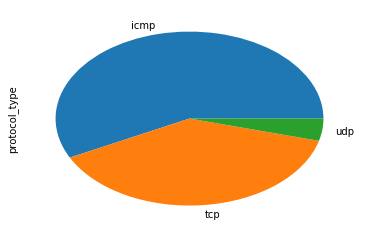

In [284]:
kdd_data_10percent['protocol_type'].value_counts().plot.pie()

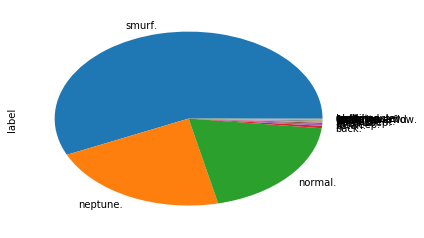

In [285]:
kdd_data_10percent['label'].value_counts().plot.pie()

In [298]:
##################################################
##### Reduce the outputs to only attack/normal
##################################################

labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()


attack.    396743
normal.     97278
Name: label, dtype: int64

In [299]:
##################################################
##### KMeans clustering
##################################################

from sklearn.cluster import KMeans
k = 59
km = KMeans(n_clusters = k)

t0 = time()
km.fit(features)
tt = time()-t0
print("Clustered in {} seconds".format(round(tt,3)))


Clustered in 60.233 seconds


In [300]:

##################################################
##### Get labels for each cluster formed
##################################################

# labels = kdd_data_10percent['label']
label_names = list(map(
    lambda x: pandas.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), 
    range(k)))


for i in range(k):
    print("Cluster {} labels:".format(i))
    print(label_names[i].value_counts())
    print()

Cluster 0 labels:
attack.    112890
normal.     24016
dtype: int64

Cluster 1 labels:
attack.    1
dtype: int64

Cluster 2 labels:
attack.    59
dtype: int64

Cluster 3 labels:
attack.    15
normal.     1
dtype: int64

Cluster 4 labels:
normal.    22
dtype: int64

Cluster 5 labels:
normal.    4
dtype: int64

Cluster 6 labels:
normal.    8
attack.    1
dtype: int64

Cluster 7 labels:
normal.    2
dtype: int64

Cluster 8 labels:
attack.    2173
normal.      35
dtype: int64

Cluster 9 labels:
normal.    2
dtype: int64

Cluster 10 labels:
normal.    443
attack.      1
dtype: int64

Cluster 11 labels:
normal.    7
dtype: int64

Cluster 12 labels:
normal.    3
dtype: int64

Cluster 13 labels:
normal.    13
dtype: int64

Cluster 14 labels:
normal.    2
attack.    1
dtype: int64

Cluster 15 labels:
normal.    737
attack.      1
dtype: int64

Cluster 16 labels:
normal.    17
dtype: int64

Cluster 17 labels:
attack.    228017
normal.       103
dtype: int64

Cluster 18 labels:
normal.    3538
att

In [ ]:
import numpy as np
x_cols = np.array(kdd_data_10percent.iloc[:, :42])
ss = []
ks = range(0, 59)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(x_cols)
    ss.append(kmeans.inertia_)
f, axes = plt.subplots(figsize=(8, 8))
axes.plot(ks, ss, marker='.')
axes.set(xlabel='K = num_cluster', ylabel = 'Sum Square Error = Inertia', title = 'Elbow Plot')

In [301]:

##################################################
##### Get one label for each cluster based on max frequency
##################################################

clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])




In [302]:

##################################################
##### Load the test data
##################################################

kdd_data_corrected = pandas.read_csv("corrected", header=None, names = col_names)
kdd_data_corrected['label'].value_counts()

corrected = kdd_data_corrected[num_features].astype(float)
true_labels = kdd_data_corrected['label'].copy()
true_labels[true_labels!='normal.'] = 'attack.'


In [303]:

##################################################
##### Predictions
##################################################

t0 = time()
pred = km.predict(corrected)
tt = time() - t0
print("Assigned clusters in {} seconds".format(round(tt,3)))

new_labels = [] 
for i in pred:                   
    new_labels.append(clusters[i])

Assigned clusters in 0.588 seconds


In [304]:

##################################################
##### Calculate Metrics
##################################################

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, hamming_loss, jaccard_similarity_score, matthews_corrcoef, zero_one_loss

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

hamming_loss = hamming_loss(true_labels, new_labels)
print("\n\nHamming Loss {}".format(hamming_loss))

jaccard_similarity_score = jaccard_similarity_score(true_labels, new_labels)
print("\n\nJaccard Similarity Score {}".format(jaccard_similarity_score))

matthews_corrcoef = matthews_corrcoef(true_labels, new_labels)
print("\n\nMatthews corrcoef {}".format(matthews_corrcoef))

zero_one_loss = zero_one_loss(true_labels, new_labels)
print("\n\nZero-One Loss {}".format(zero_one_loss))



Accuracy 92.022 %


Confusion Matrix: 

 [[243337   7099]
 [ 17716  42877]]


Classification Scores: 

              precision    recall  f1-score   support

    attack.       0.93      0.97      0.95    250436
    normal.       0.86      0.71      0.78     60593

avg / total       0.92      0.92      0.92    311029



Hamming Loss 0.07978355716026479


Jaccard Similarity Score 0.9202164428397352


Matthews corrcoef 0.7325901263573789


Zero-One Loss 0.07978355716026475


[[243337   7099]
 [ 17716  42877]]


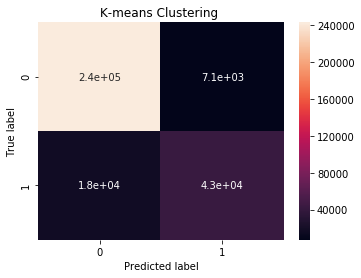

In [305]:
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(true_labels, new_labels) 
print(cm)

# Transform to df for easier plotting
cm_df = pandas.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('K-means Clustering ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()